In [0]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
from tensorflow import keras

In [0]:
from tensorflow.keras.datasets import cifar10

In [0]:
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

In [4]:
print(len(train_images))
print(len(test_images))
print(train_images.shape)
print(test_images.shape)

50000
10000
(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [0]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

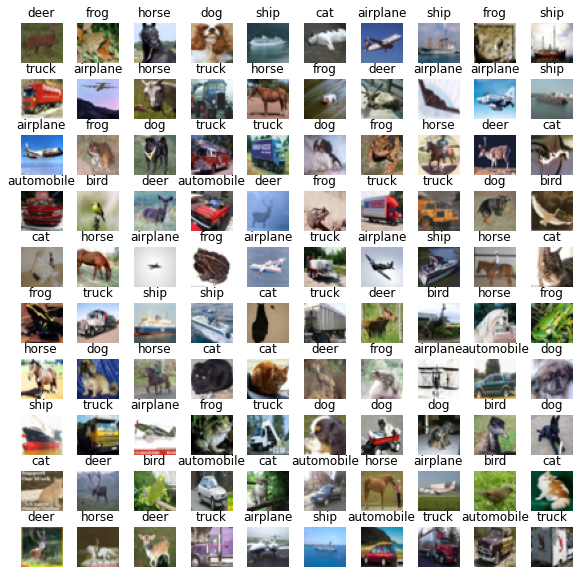

In [6]:
fig, axes = plt.subplots(10, 10, figsize=(10, 10))
axes = axes.ravel()
n_train = len(train_images)
for i in np.arange(0, 100):
  index = np.random.randint(0, n_train)
  axes[i].imshow(train_images[index, 1:])
  label_index = int(train_labels[index])
  axes[i].set_title(class_names[label_index])
  axes[i].axis("off")
plt.subplots_adjust(hspace = 0.4)

In [0]:
# Scaling the images
train_images = train_images / 255.0
test_images = test_images / 255.0

In [0]:
from tensorflow.keras.utils import to_categorical

In [0]:
train_labels_cat = to_categorical(train_labels, 10)
test_labels_cat = to_categorical(test_labels, 10)

In [10]:
train_labels

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [11]:
train_labels_cat

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [0]:
model = keras.Sequential([
        keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(32, 32, 3)),
        keras.layers.MaxPool2D((2, 2)),
        keras.layers.Dropout(0.2),
        keras.layers.Conv2D(32, (3, 3), activation='relu'),
        keras.layers.MaxPool2D((2, 2)),
        keras.layers.Dropout(0.2),
        keras.layers.Conv2D(64, (3, 3), activation='relu'),
        keras.layers.MaxPool2D((2, 2)),
        keras.layers.Dropout(0.2),
        keras.layers.Flatten(),
        keras.layers.Dense(128, activation='relu'),
        keras.layers.Dense(10, activation='softmax'),
])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 15, 15, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 32)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 6, 6, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          1

In [0]:
model.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

In [15]:
history = model.fit(
    train_images,
    train_labels_cat,
    epochs = 50,
    validation_data = (test_images, test_labels_cat)
)

Epoch 1/50
1563/1563 [==============================] - 11s 7ms/step - loss: 1.6395 - accuracy: 0.3950 - val_loss: 1.3498 - val_accuracy: 0.5192
Epoch 2/50
1563/1563 [==============================] - 11s 7ms/step - loss: 1.3477 - accuracy: 0.5141 - val_loss: 1.2025 - val_accuracy: 0.5746
Epoch 3/50
1563/1563 [==============================] - 11s 7ms/step - loss: 1.2399 - accuracy: 0.5551 - val_loss: 1.2005 - val_accuracy: 0.5645
Epoch 4/50
1563/1563 [==============================] - 11s 7ms/step - loss: 1.1769 - accuracy: 0.5813 - val_loss: 1.0689 - val_accuracy: 0.6190
Epoch 5/50
1563/1563 [==============================] - 11s 7ms/step - loss: 1.1255 - accuracy: 0.6003 - val_loss: 1.0229 - val_accuracy: 0.6383
Epoch 6/50
1563/1563 [==============================] - 11s 7ms/step - loss: 1.0845 - accuracy: 0.6141 - val_loss: 1.0161 - val_accuracy: 0.6399
Epoch 7/50
1563/1563 [==============================] - 11s 7ms/step - loss: 1.0587 - accuracy: 0.6242 - val_loss: 0.9899 - val_ac

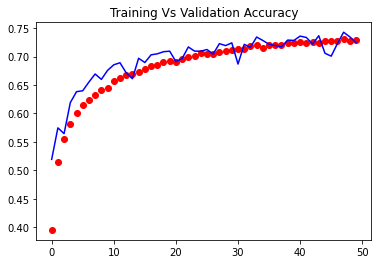

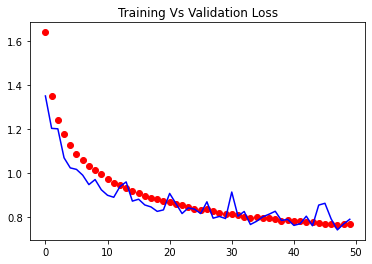

In [18]:
acc = history.history['accuracy']
validation_acc = history.history['val_accuracy']
loss = history.history['loss']
validation_loss = history.history['val_loss']

epochs = range(len(acc))
plt.plot(epochs, acc, 'ro', label='Training Accuracy')
plt.plot(epochs, validation_acc, 'b', label='Validation Accuracy')
plt.title("Training Vs Validation Accuracy")
plt.figure()

plt.plot(epochs, loss, 'ro', label='Training Loss')
plt.plot(epochs, validation_loss, 'b', label='Validation Loss')
plt.title("Training Vs Validation Loss")
plt.show()

In [22]:
test_loss, test_acc = model.evaluate(test_images, test_labels_cat)
print('Test Accuracy : ' + str(test_acc*100) + ' %')

313/313 [==============================] - 1s 4ms/step - loss: 0.7893 - accuracy: 0.7247
Test Accuracy : 72.46999740600586 %


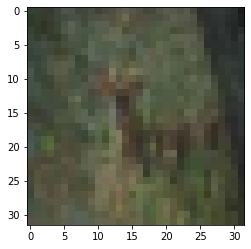

In [23]:
random_image = train_images[10]
plt.imshow(random_image)

In [25]:
train_labels[10]

array([4], dtype=uint8)

In [27]:
class_names[4]

'deer'

In [0]:
predicted = model.predict(train_images[10].reshape(1, 32, 32, 3))

In [30]:
predicted

array([[2.8290440e-05, 1.6131706e-07, 3.6395993e-02, 6.3674166e-03,
        7.9401094e-01, 4.1142586e-04, 1.6271511e-01, 4.6899564e-05,
        9.7114371e-06, 1.3958807e-05]], dtype=float32)

In [31]:
np.argmax(predicted)

4

In [32]:
class_names[4]

'deer'

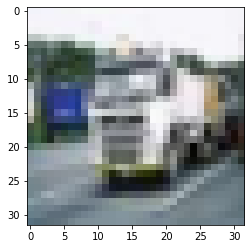

In [33]:
random_image2 = train_images[1000]
plt.imshow(random_image2)

In [34]:
train_labels[1000]

array([9], dtype=uint8)

In [35]:
class_names[9]

'truck'

In [0]:
predicted2 = model.predict(random_image2.reshape(1, 32, 32 ,3))

In [39]:
predicted2

array([[8.57043732e-03, 7.15545639e-02, 1.82563803e-04, 1.46828490e-04,
        1.11640475e-05, 4.30472537e-05, 1.37671741e-04, 2.97249771e-05,
        1.05221003e-01, 8.14102948e-01]], dtype=float32)

In [43]:
np.argmax(predicted2)

9